In [1]:
import resiliencyTool as rt
import warnings
import numpy as np
from datetime import date as dt_date

warnings.simplefilter("ignore") # warning are ignored for now

In [2]:
simulationName = 'basic_example';
network = rt.network.Network(simulationName);
simulation = rt.simulation.Sim(simulationName);

start= 1, stop= 41
start= 12, stop= 17


In [3]:
geodata1 = rt.network.GeoData(47.4,5.8)
geodata2 = rt.network.GeoData(54.9,15.0)
hz = rt.hazard.Hazard()
hz.geospatial_generator(geodata1,geodata2, 10)

sdate = dt_date(2022,4,1)   # start date
edate = dt_date(2022,4,3)   # end date

hz.datetime_generator(sdate,edate,frequency='1H')

DatetimeIndex(['2022-04-01 00:00:00', '2022-04-01 01:00:00',
               '2022-04-01 02:00:00', '2022-04-01 03:00:00',
               '2022-04-01 04:00:00', '2022-04-01 05:00:00',
               '2022-04-01 06:00:00', '2022-04-01 07:00:00',
               '2022-04-01 08:00:00', '2022-04-01 09:00:00',
               '2022-04-01 10:00:00', '2022-04-01 11:00:00',
               '2022-04-01 12:00:00', '2022-04-01 13:00:00',
               '2022-04-01 14:00:00', '2022-04-01 15:00:00',
               '2022-04-01 16:00:00', '2022-04-01 17:00:00',
               '2022-04-01 18:00:00', '2022-04-01 19:00:00',
               '2022-04-01 20:00:00', '2022-04-01 21:00:00',
               '2022-04-01 22:00:00', '2022-04-01 23:00:00',
               '2022-04-02 00:00:00', '2022-04-02 01:00:00',
               '2022-04-02 02:00:00', '2022-04-02 03:00:00',
               '2022-04-02 04:00:00', '2022-04-02 05:00:00',
               '2022-04-02 06:00:00', '2022-04-02 07:00:00',
               '2022-04-

In [4]:
#hz.epicenterTrajectory_generator(epicenter_radius=1, epicenter_intensity=1, epicenter_lat=49.4, epicenter_lon=9)

simulationName = 'basic_example';
filename = 'trajectory.csv';
hz.epicenterTrajectory_reader(simulationName, filename).head()

,time,lon,lat,intensity,radius
0,01.04.2022 00:00,6.9,47.9,0.10,1
1,01.04.2022 01:00,7.1,47.9,0.11,1
2,01.04.2022 02:00,7.4,48.0,0.13,1
3,01.04.2022 03:00,7.6,48.1,0.14,1
4,01.04.2022 04:00,7.7,48.2,0.21,1


In [5]:
hazard_grid = hz.grid_generator(max_intensity=60, max_radius=50.)
hazard_grid

,DateTime,latitude,longitude,intensity
0,2022-04-01,47.400000,5.800000,0.0
1,2022-04-01,47.400000,5.890090,0.0
2,2022-04-01,47.400000,5.980180,0.0
3,2022-04-01,47.400000,6.070270,0.0
4,2022-04-01,47.400000,6.160360,0.0
...,...,...,...,...
423943,2022-04-03,54.877477,14.628829,0.0
423944,2022-04-03,54.877477,14.718919,0.0
423945,2022-04-03,54.877477,14.809009,0.0
423946,2022-04-03,54.877477,14.899099,0.0


In [6]:
hz.to_nc(hazard_grid, simulationName, 'sythetic_data.nc')

In [7]:
cols, lon, lat, time, intensity = hz.read_nc(simulationName, 'sythetic_data.nc')

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:title={'center':'Intensity of hazard event'}>)

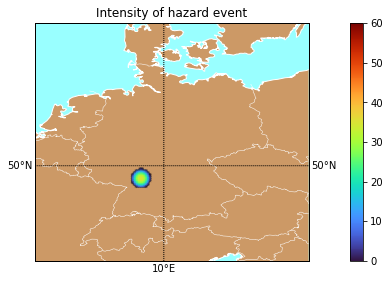

In [22]:
hz.plot(11,edge_pad=2)

In [23]:
hz.plot_gif(simulationName,speed=10)

![intensity_gif](file/input/basic_example/hazards/gif/intensity_timelapse.gif "intensity_gif")

(array([19083.  , 19083.25, 19083.5 , 19083.75, 19084.  , 19084.25,
        19084.5 , 19084.75, 19085.  ]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

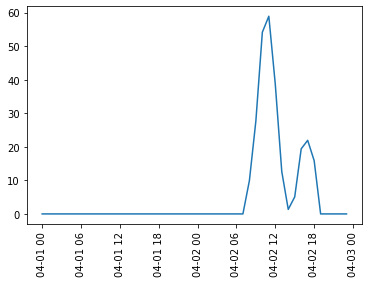

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
time, intensity = hz.get_intensity(8.2, 52.2, pd.to_datetime(sdate), pd.to_datetime(edate))
plt.plot(time,intensity)
plt.xticks(rotation=90)